## **Implémentation d'une regression logistique**

In [43]:
from config import *

In [44]:
# Importation des données
df = pd.read_csv(r'C:\Users\HP1\OneDrive\Bureau\PROJETS_DATA\Projet_Credit_Card_Model\Data\Credit-Card-Train-Clean.csv')

In [45]:
# Encodage des variables catégorielles
cat_df = df[['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status', 'Credit_History']]
num_df = df[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']]
le = LabelEncoder()
for i in cat_df.columns:
    cat_df[i] = le.fit_transform(cat_df[i])
cat_df

C:\Users\HP1\AppData\Local\Temp\ipykernel_11328\2367802384.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_df[i] = le.fit_transform(cat_df[i])
C:\Users\HP1\AppData\Local\Temp\ipykernel_11328\2367802384.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_df[i] = le.fit_transform(cat_df[i])
C:\Users\HP1\AppData\Local\Temp\ipykernel_11328\2367802384.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status,Credit_History
0,1,0,0,0,0,2,1,1
1,1,1,1,0,0,0,0,1
2,1,1,0,0,1,2,1,1
3,1,1,0,1,0,2,1,1
4,1,0,0,0,0,2,1,1
...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,0,1,1
610,1,1,3,0,0,0,1,1
611,1,1,1,0,0,2,1,1
612,1,1,2,0,0,2,1,1


In [46]:
# Sélectionner les variables explicatives et la variable d'intérêt
X = df[[ 'Married', 'Dependents', 'Education', 'Credit_History', 'Property_Area', 'Gender',
        'ApplicantIncome', 'LoanAmount', 'Self_Employed', 'CoapplicantIncome', 'Loan_Amount_Term', ]]
y = df['Loan_Status']

In [47]:
from sklearn.preprocessing import OneHotEncoder
# Initialiser le OneHotEncoder
one_hot_encoder = OneHotEncoder(drop='first', sparse_output=False)

# Appliquer OneHotEncoder sur toutes les variables catégorielles
# Sélectionner toutes les colonnes catégorielles
cat_columns = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Credit_History', 'Property_Area']

# Appliquer OneHotEncoder et convertir le résultat en DataFrame
one_hot_encoded = one_hot_encoder.fit_transform(X[cat_columns])

# Convertir le résultat en DataFrame avec les nouvelles colonnes
encoded_df = pd.DataFrame(one_hot_encoded, columns=one_hot_encoder.get_feature_names_out(cat_columns))

# Concaténer le DataFrame encodé avec le reste des données
X = pd.concat([X.drop(columns=cat_columns), encoded_df], axis=1)

# Afficher le DataFrame final
X

,ApplicantIncome,LoanAmount,CoapplicantIncome,Loan_Amount_Term,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Credit_History_1.0,Property_Area_Semiurban,Property_Area_Urban
0,5849,128.0,0.0,360.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,4583,128.0,1508.0,360.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,3000,66.0,0.0,360.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
3,2583,120.0,2358.0,360.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
4,6000,141.0,0.0,360.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,2900,71.0,0.0,360.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
610,4106,40.0,0.0,180.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
611,8072,253.0,240.0,360.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
612,7583,187.0,0.0,360.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0


In [48]:
# Ajouter une constante pour l'interception
X = sm.add_constant(X)

In [49]:
from sklearn.model_selection import train_test_split

# Diviser les données avec stratification pour conserver la distribution des classes
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

# Vérification de la répartition des classes dans les ensembles d'entraînement et de test
print(y_train.value_counts())
print(y_test.value_counts())



Loan_Status
Y    316
N    144
Name: count, dtype: int64
Loan_Status
Y    106
N     48
Name: count, dtype: int64


In [50]:
print('X_train taille : ' , X_train.shape)
print('X_test taille : ' ,X_test.shape)
print('y_train taille : ' ,y_train.shape)
print('y_test taille : ' ,y_test.shape)

X_train taille :  (460, 15)
X_test taille :  (154, 15)
y_train taille :  (460,)
y_test taille :  (154,)


In [53]:
# Créer le modèle de régression logistique
logit_model = sm.Logit(X_train, y_train)

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

In [ ]:
# Ajuster le modèle aux données d'apprentissage
result = logit_model.fit()

Optimization terminated successfully.
         Current function value: 0.479428
         Iterations 6


In [ ]:
# Afficher le résumé des résultats de la régression
print(result.summary())

                           Logit Regression Results                           
Dep. Variable:            Loan_Status   No. Observations:                  460
Model:                          Logit   Df Residuals:                      445
Method:                           MLE   Df Model:                           14
Date:                Thu, 06 Feb 2025   Pseudo R-squ.:                  0.2286
Time:                        17:00:08   Log-Likelihood:                -220.54
converged:                       True   LL-Null:                       -285.90
Covariance Type:            nonrobust   LLR p-value:                 4.901e-21
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -2.3677      0.928     -2.551      0.011      -4.187      -0.548
ApplicantIncome          7.926e-06   2.57e-05      0.309      0.757   -4.24e-05    5.82e-05


Rapport de classification pour le test :
              precision    recall  f1-score   support

           0       0.86      0.65      0.74        48
           1       0.86      0.95      0.90       106

    accuracy                           0.86       154
   macro avg       0.86      0.80      0.82       154
weighted avg       0.86      0.86      0.85       154

Matrice de confusion pour le test :
[[ 31  17]
 [  5 101]]
Rapport de classification pour l'entraînement :
              precision    recall  f1-score   support

           0       0.80      0.42      0.55       144
           1       0.78      0.95      0.86       316

    accuracy                           0.79       460
   macro avg       0.79      0.69      0.71       460
weighted avg       0.79      0.79      0.76       460

Matrice de confusion pour l'entraînement :
[[ 61  83]
 [ 15 301]]


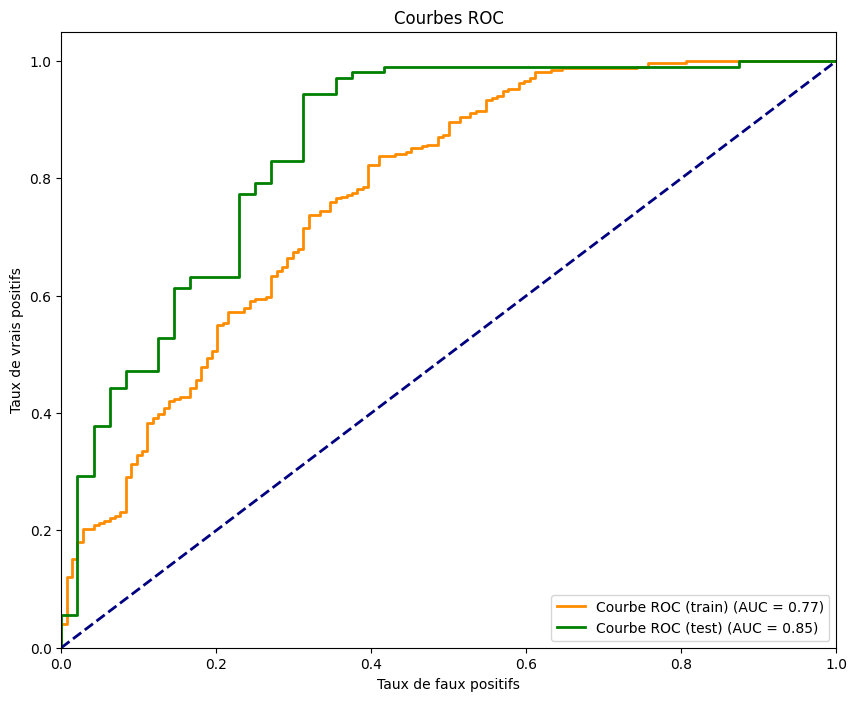

In [ ]:
# Obtenir les prédictions du modèle sur l'ensemble d'entraînement et de test
y_train_pred = result.predict(X_train)
y_test_pred = result.predict(X_test)

# Calculer les courbes ROC et les aires sous la courbe (AUC)
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_pred)
roc_auc_train = auc(fpr_train, tpr_train)

fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_test_pred)
roc_auc_test = auc(fpr_test, tpr_test)

# Prédire les classes sur la base de test avec un seuil de 0.65
y_test_pred_class = (y_test_pred > 0.6).astype(int)
y_train_pred_class = (y_train_pred > 0.6).astype(int)

# Générer le rapport de classification pour le test
print("Rapport de classification pour le test :")
print(classification_report(y_test, y_test_pred_class))

# Afficher la matrice de confusion pour le test
print("Matrice de confusion pour le test :")
print(cm(y_test, y_test_pred_class))  # Utiliser 'cm' au lieu de 'confusion_matrix'

# Générer le rapport de classification pour l'entraînement
print("Rapport de classification pour l'entraînement :")
print(classification_report(y_train, y_train_pred_class))

# Afficher la matrice de confusion pour l'entraînement
print("Matrice de confusion pour l'entraînement :")
print(cm(y_train, y_train_pred_class))  # Utiliser 'cm' au lieu de 'confusion_matrix'

# Tracer les courbes ROC
plt.figure(figsize=(10, 8))
plt.plot(fpr_train, tpr_train, color='darkorange', lw=2, label='Courbe ROC (train) (AUC = %0.2f)' % roc_auc_train)
plt.plot(fpr_test, tpr_test, color='green', lw=2, label='Courbe ROC (test) (AUC = %0.2f)' % roc_auc_test)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbes ROC')
plt.legend(loc="lower right")
plt.show()


In [54]:


# Afficher la distribution initiale des classes
print("Avant l'oversampling, la distribution des classes :")
print(Counter(y_train))

# Appliquer SMOTE sur l'ensemble d'entraînement
smote = SMOTE(sampling_strategy='auto', random_state=42)  # 'auto' signifie que l'on veut équilibrer les classes
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Afficher la distribution des classes après SMOTE
print("Après l'oversampling, la distribution des classes :")
print(Counter(y_train_resampled))

# Créer et entraîner le modèle de régression logistique sur les données rééchantillonnées
logit_model = sm.Logit(y_train_resampled, X_train_resampled)
result = logit_model.fit()

# Prédictions sur les ensembles de test et d'entraînement
y_train_pred = result.predict(X_train_resampled)
y_test_pred = result.predict(X_test)

# Calculer les courbes ROC et AUC
fpr_train, tpr_train, thresholds_train = roc_curve(y_train_resampled, y_train_pred)
roc_auc_train = auc(fpr_train, tpr_train)

fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_test_pred)
roc_auc_test = auc(fpr_test, tpr_test)

# Afficher les courbes ROC
plt.figure(figsize=(10, 8))
plt.plot(fpr_train, tpr_train, color='darkorange', lw=2, label='Courbe ROC (train) (AUC = %0.2f)' % roc_auc_train)
plt.plot(fpr_test, tpr_test, color='green', lw=2, label='Courbe ROC (test) (AUC = %0.2f)' % roc_auc_test)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbes ROC')
plt.legend(loc="lower right")
plt.show()


Avant l'oversampling, la distribution des classes :
Counter({'Y': 316, 'N': 144})
Après l'oversampling, la distribution des classes :
Counter({'N': 316, 'Y': 316})


ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).